In [31]:
from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean
import prediccion
df = pd.read_csv('diamonds.csv')


## ¿Que es lo que buscamos predecir?
Lo que se busca predecir es el precio del diamante. Se entiende que el precio esta determinado segun las caracteristicas que el diamante posea.
Por lo tanto el precio va a ser la variable dependiente mientras que el resto van a ser las independientes.


## Separacion de variables dependientes de las independientes ##
Primero establecemos las variables dependientes E independientes. Con solo decirle al objeto cual es el dependiente basta<br>


In [32]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


In [33]:
algoPrediccion = prediccion.RegresionModelo(df)
algoPrediccion.df
algoPrediccion.definirConjuntoDeVariablesIndependientesYDependientes('price')
algoPrediccion.X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74


Por ultimo la variable dependiente

In [34]:
algoPrediccion.Y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# De categoricos a valores  numericos <br>
Ya de antemano contamos con variables independientes categoricos.<br>
El siguiente paso es convertir los datos de aquellas columnas en datos numericos <br>
Las variables independientes categoricas son

In [35]:
algoPrediccion.columnasCategorica()

['cut', 'color', 'clarity']

Vallamos paso por paso

In [36]:
algoPrediccion.deCategoricoANumerico('cut')

,cut,cut
0,2,Ideal
1,3,Premium
2,1,Good
3,3,Premium
4,1,Good


In [37]:
algoPrediccion.deCategoricoANumerico('color')

,color,color
0,1,E
1,1,E
2,1,E
3,5,I
4,6,J


In [38]:
algoPrediccion.deCategoricoANumerico('clarity')

,clarity,clarity
0,3,SI2
1,2,SI1
2,4,VS1
3,5,VS2
4,3,SI2


Las variables categóricas, como la talla (Cut), el color (Color) y la claridad (Clarity), se podrian ver  beneficiados de la codificación one-hot, que implica crear variables dummy para cada categoría en lugar de escalar los datos. La razón principal es que estas variables no tienen un orden inherente y no se puede establecer una relación numérica directa entre las diferentes categorías.

In [39]:

algoPrediccion.conversionDeCategorioADummieNumerico()


array([[0.  , 0.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.  , 0.  , 0.  , ..., 3.89, 3.84, 2.31],
       [0.  , 1.  , 0.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.  , 0.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.  , 0.  , 0.  , ..., 6.15, 6.12, 3.74],
       [0.  , 0.  , 1.  , ..., 5.83, 5.87, 3.64]])

In [40]:
algoPrediccion.evitarTrampa()

A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y  el 20% de los datos al conjunto de pruebas usando el código de abajo.

In [41]:

algoPrediccion.divisionDeConjuntos()
algoPrediccion.X_train.shape



(43152, 25)

In [42]:
algoPrediccion.X_test.shape

(10788, 25)

In [43]:
algoPrediccion.y_test.shape

(10788, 1)

In [44]:
algoPrediccion.y_train.shape

(43152, 1)

#### Entrenamiento

Ahora vamos a entrenar nuestro modelo

In [45]:

algoPrediccion.entrenar()


#### Predicción sobre los datos de la prueba

In [46]:
algoPrediccion.prediccion()

# Resultados de la prediccion <br>
## Datos sobre columnas adicionales
* Diferencia = la diferencia numerica entre el dato real y su prediccion <br>
* Diferencia porcentual % = La diferencia entre el dato real y su prediccion  en terminos porcentuales. Este campo puede superar el 100% si la diferencia es muy grande<br>
* Eficacia de prediccion% = indica el porcentaje de acierto que hay entre la prediccion y el dato real. En esta columna cuanto mayor es el numero mejor<br>
* Error porcentual de prediccion% = indica porcentualmente que tan lejos se estubo de acertar la prediccion. En esta columna cuanto MENOR es el numero mejor. Para este caso en particular el campo no supera nunca el 100% . Si la diferencia porcentual es muy alta entonces el error porcentual de prediccion puede acercarse demasiado al 100%

In [47]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,4733,4910.11,177.11,3.74
1,6424,7589.96,1165.96,18.15
2,5510,6138.47,628.47,11.41
3,8770,10293.72,1523.72,17.37
4,4493,5248.09,755.09,16.81
...,...,...,...,...
10783,1289,1126.88,162.12,12.58
10784,3435,3515.69,80.69,2.35
10785,3847,5266.79,1419.79,36.91
10786,8168,6975.63,1192.37,14.60


Analicemos el ultimo caso que se muestra. Vemos que el valor real  del precio del diamante es de  $1917  y su prediccion fue del 2317.14. Osea que dando una diferencia del 20.87% entre ambos (lo cual no es tan malo) significando una eficacia en la prediccion del 79.13% con lo cual concluimos para este caso que le falto un 20.87%.
<Br>
El primer caso da un mejor numero dandonos un resultado de prediccion de un 96.07%


Veamos una comparativa grafica del valor real vs la prediccion

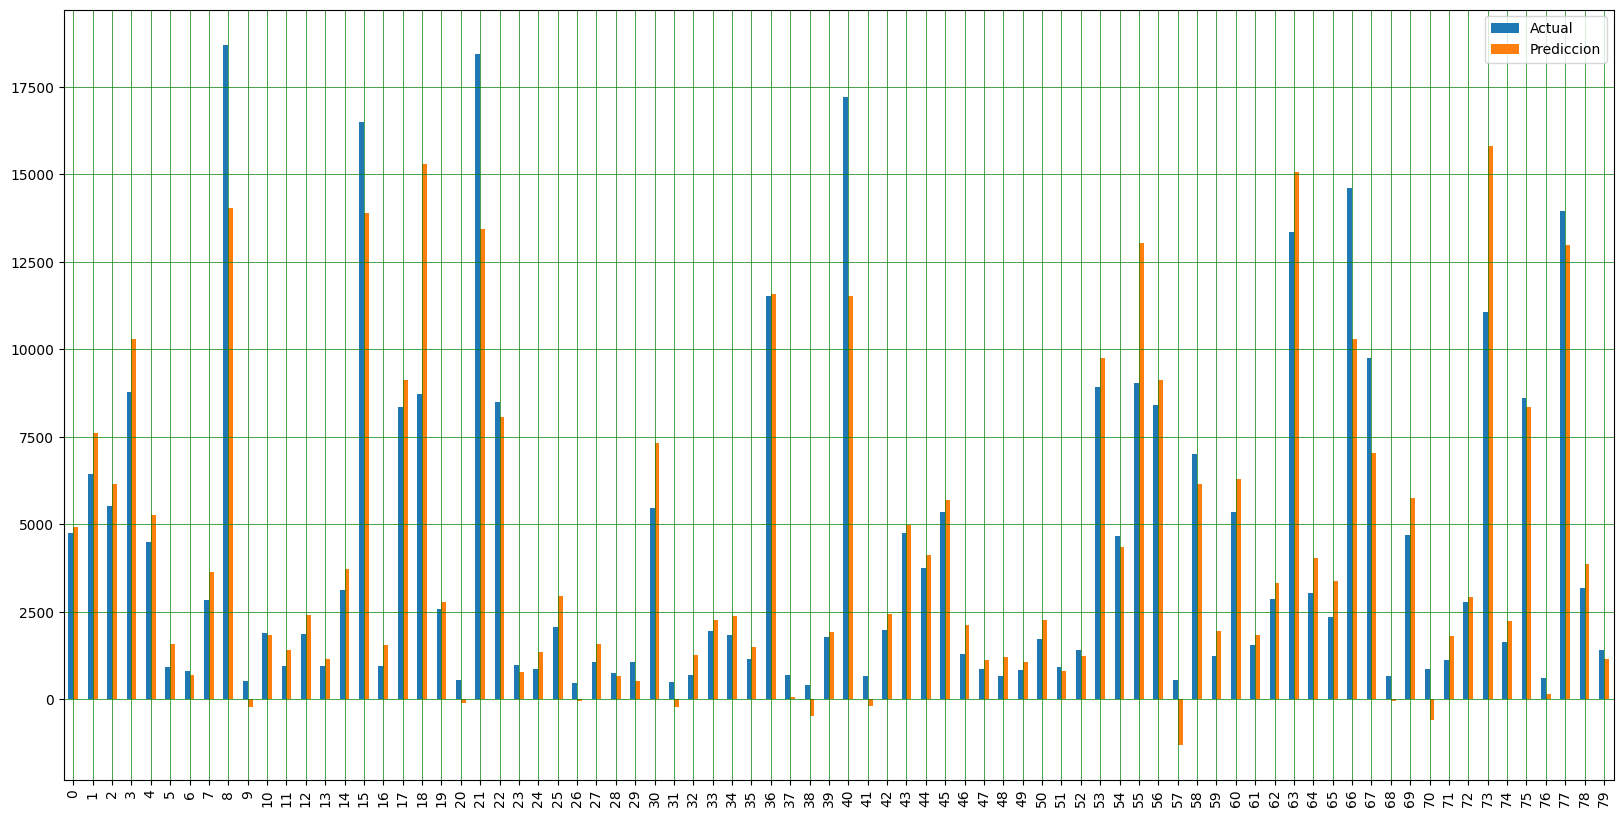

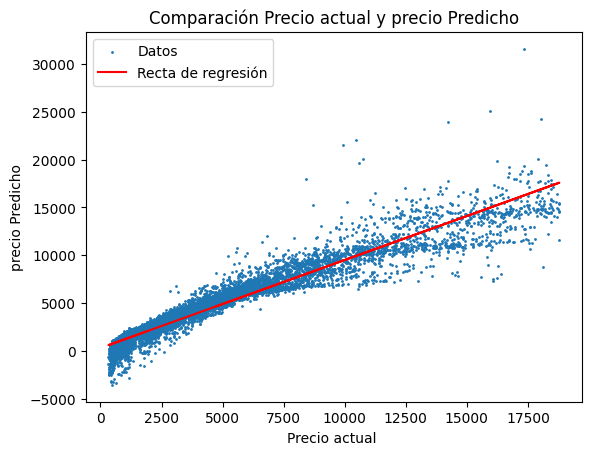

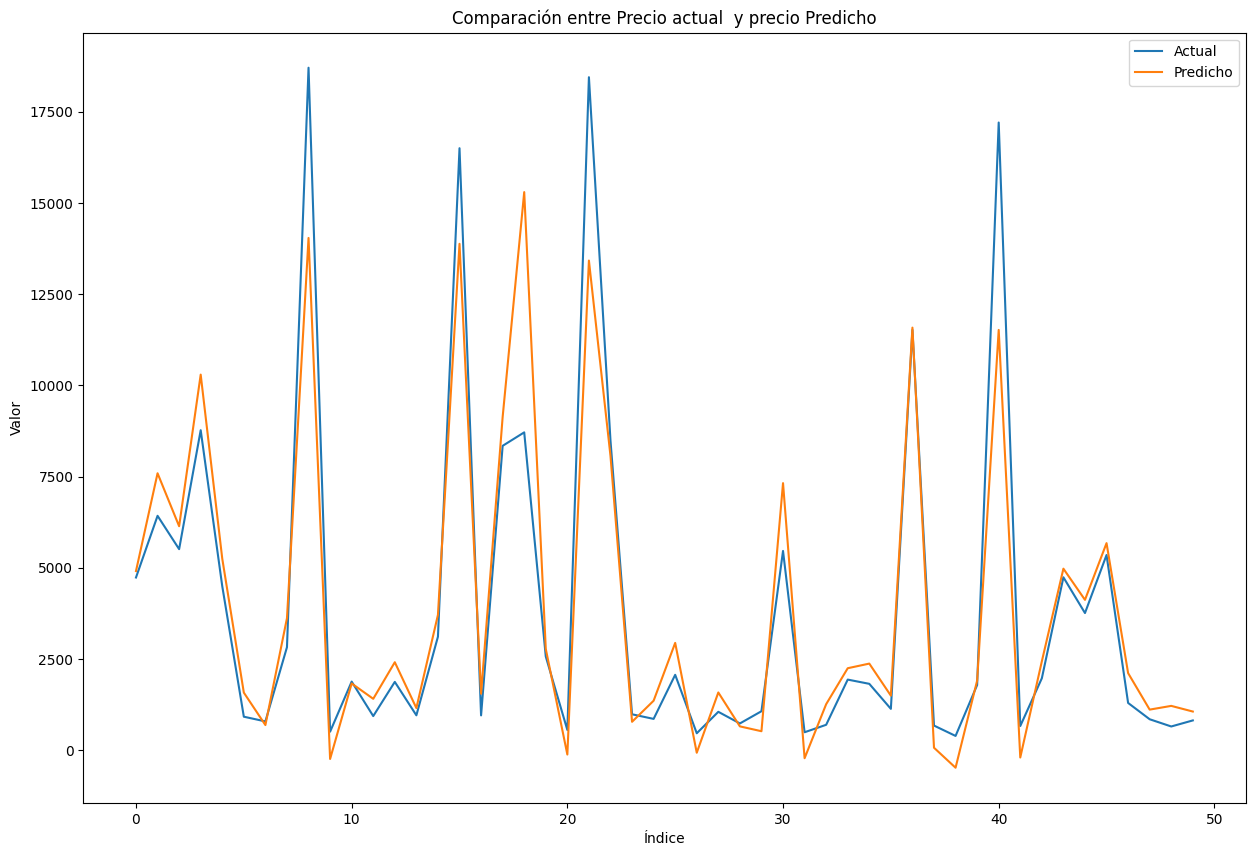

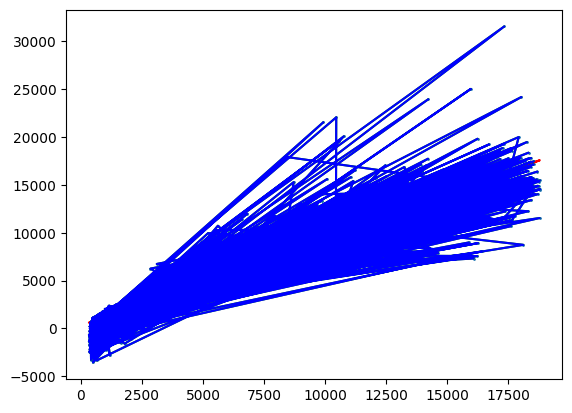

In [48]:
algoPrediccion.todasLasComparacionesDeActualPrediccion()

In [49]:
algoPrediccion.resultadoDeEntrenamiento().describe()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
count,10788.00,10788.00,10788.00,10788.00
mean,3929.21,3914.43,737.74,39.46
std,3981.60,3815.38,839.18,65.48
min,326.00,-3558.25,0.09,0.00
25%,947.50,1040.45,259.89,9.13
50%,2398.00,2828.63,532.77,20.28
75%,5311.25,5892.33,880.55,41.37
max,18787.00,31561.38,14232.38,893.24


In [50]:
algoPrediccion.conclusiones()

,Media,Error %,Efectividad %
Mean Absolute Error,737.74,18.76,81.24
Root Mean Squared Error,1117.32,28.41,71.59
Mean Squared Error,1248413.36,NaN,NaN


Analizando la fila Mean concluimos que nuestro algoritmo en promedio fue efectivo en un 69.71% lo que no es  un numero demasiado malo pero quizas se podria mejorar . 
Tambien podemos sacar otras conclusiones como por ejemplo que aquel juego que tubo un mejor acierto en su prediccion dio en un 99.99% de acierto pero el peor caso dio un 0.09% en prediccion por lo que la diferencia entre el valor real y el predecido fue muy alto.<Br>


In [51]:
algoPrediccion.regresionOLSResultados()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        15:05:15   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           579.7514     33.592     17.259      0.000     513.911     645.592
x2           832.9118     33.407     24.932      0.000     767.433     898.391
x3           762.1440     32.228     23.649      0.000     698.978     825.310
x4           726.7826     32.241     22.542      0.000     663.591     789.975
x5          3584.8729    216.253     16.577      0.000    3161.015    4008.731
x6          3375.7549    216.151     15.618      0.000    2952.097    3799.413
x7          3312.0191    216.278     15.314      0.000    2888.112    3735.926
x8          3102.8340    216.417     14.337      0.000    2678.655    3527.013
x9          2604.6063    216.533     12.029      0.000    2180.200    3029.012
x10         2118.6285    216.680      9.778      0.000    1693.934    2543.323
x11         1215.4749    217.078      5.599      0.000     790.001    1640.949
x12        -1400.3956    194.098     -7.215      0.000   -1780.829   -1019.962
x13         3944.7067    189.271     20.842      0.000    3573.734    4315.680
x14         2265.0765    190.203     11.909      0.000    1892.278    2637.875
x15         1302.1907    190.054      6.852      0.000     929.683    1674.699
x16         3178.0023    189.421     16.777      0.000    2806.736    3549.268
x17         2866.8280    189.665     15.115      0.000    2495.083    3238.573
x18         3607.3635    189.072     19.079      0.000    3236.781    3977.946
x19         3550.4185    189.245     18.761      0.000    3179.497    3921.340
x20         1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
x21          -63.8061      4.535    -14.071      0.000     -72.694     -54.918
x22          -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x23        -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
x24            9.6089     19.333      0.497      0.619     -28.284      47.502
x25          -50.1189     33.486     -1.497      0.134    -115.752      15.515
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.91e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Bueno arriba vemos demasiada informacion y solo nos basta saber cual es la columna con un p>0.05 . Para esto se creo un metodo adicional que va mas al grano

In [52]:
algoPrediccion.todosLosP()


        
  

,P-Values,P>0.05
0,0.000,False
1,0.000,False
2,0.000,False
3,0.000,False
4,0.000,False
5,0.000,False
6,0.000,False
7,0.000,False
8,0.000,False
9,0.000,False


Ahora mostremos aquellos que superen el 0.05 

In [53]:
algoPrediccion.todosLosPQueSuperaAlSL()

,P-Values,P>0.05
23,0.619,True
24,0.134,True


veamos cuales son los indices reales

In [54]:
algoPrediccion.obtenerIndicesDeAquellosQueSuperanAlLS()

[23, 24]

In [55]:
algoPrediccion.eliminarColumnasQueSuperenAlSL()
algoPrediccion.todosLosP()

,P-Values,P>0.05
0,0.000,False
1,0.000,False
2,0.000,False
3,0.000,False
4,0.000,False
5,0.000,False
6,0.000,False
7,0.000,False
8,0.000,False
9,0.000,False


vemos que ningun p supera al 0.05. Por las dudas veamos el resultado completo

In [56]:
algoPrediccion.regresionOLSResultados()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        15:05:16   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           580.2405     33.572     17.283      0.000     514.438     646.043
x2           833.2603     33.396     24.951      0.000     767.804     898.716
x3           762.7586     32.225     23.670      0.000     699.598     825.919
x4           726.8201     32.212     22.564      0.000     663.685     789.955
x5          3681.4172    206.740     17.807      0.000    3276.204    4086.630
x6          3472.1802    206.659     16.801      0.000    3067.127    3877.233
x7          3408.5831    206.764     16.485      0.000    3003.325    3813.841
x8          3199.4743    206.892     15.464      0.000    2793.963    3604.985
x9          2701.2954    207.004     13.049      0.000    2295.566    3107.025
x10         2215.2357    207.173     10.693      0.000    1809.174    2621.297
x11         1311.9135    207.624      6.319      0.000     904.969    1718.858
x12        -1315.3314    185.861     -7.077      0.000   -1679.621    -951.042
x13         4029.0067    180.990     22.261      0.000    3674.265    4383.748
x14         2349.5739    181.921     12.915      0.000    1993.008    2706.140
x15         1386.7456    181.754      7.630      0.000    1030.506    1742.985
x16         3262.2578    181.155     18.008      0.000    2907.193    3617.323
x17         2951.2803    181.367     16.272      0.000    2595.799    3306.762
x18         3691.7297    180.765     20.423      0.000    3337.428    4046.031
x19         3634.8366    180.936     20.089      0.000    3280.200    3989.473
x20         1.126e+04     48.600    231.626      0.000    1.12e+04    1.14e+04
x21          -66.7693      4.091    -16.322      0.000     -74.787     -58.752
x22          -26.4573      2.911     -9.089      0.000     -32.163     -20.752
x23        -1029.4779     20.549    -50.098      0.000   -1069.755    -989.201
==============================================================================
Omnibus:                    14433.691   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566407.977
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.833   Cond. No.                     7.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.91e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
algoPrediccion.realizarEntrenamientoCompleto()
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,4733,4910.86,177.86,3.76
1,6424,7590.37,1166.37,18.16
2,5510,6137.91,627.91,11.40
3,8770,10292.28,1522.28,17.36
4,4493,5248.32,755.32,16.81
...,...,...,...,...
10783,1289,1127.01,161.99,12.57
10784,3435,3516.20,81.20,2.36
10785,3847,5266.55,1419.55,36.90
10786,8168,6976.04,1191.96,14.59


In [58]:
algoPrediccion.resultadoDeEntrenamiento().describe()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
count,10788.00,10788.00,10788.00,10788.00
mean,3929.21,3914.43,737.78,39.47
std,3981.60,3815.47,839.16,65.49
min,326.00,-3557.64,0.02,0.00
25%,947.50,1039.92,260.60,9.14
50%,2398.00,2827.59,532.29,20.28
75%,5311.25,5893.73,880.99,41.37
max,18787.00,31566.50,14237.50,893.16


La mejora no fue realmente significativa. Sin embargo antes de pasar al siguiente algoritmo quizas podemos escalar

In [59]:
algoPrediccion.conclusiones()

,Media,Error %,Efectividad %
Mean Absolute Error,737.78,18.76,81.24
Root Mean Squared Error,1117.33,28.41,71.59
Mean Squared Error,1248435.26,NaN,NaN


In [60]:
algoPrediccion.realizarEntrenamientoCompleto()
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,4733,4910.86,177.86,3.76
1,6424,7590.37,1166.37,18.16
2,5510,6137.91,627.91,11.40
3,8770,10292.28,1522.28,17.36
4,4493,5248.32,755.32,16.81
...,...,...,...,...
10783,1289,1127.01,161.99,12.57
10784,3435,3516.20,81.20,2.36
10785,3847,5266.55,1419.55,36.90
10786,8168,6976.04,1191.96,14.59
